In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
#install to download the dataset easily
!pip install -U --no-cache-dir gdown --pre
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
#download dataset
!gdown 18wEiRTNkFRp5Xlt1pvtw8q7Me_lENX21


Downloading...
From: https://drive.google.com/uc?id=18wEiRTNkFRp5Xlt1pvtw8q7Me_lENX21
To: /content/Dental.rar
100% 40.1M/40.1M [00:00<00:00, 43.4MB/s]


In [4]:
#unzip dataset
!unrar x "/content/Dental.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Dental.rar

Creating    Dental                                                    OK
Creating    Dental/Argon                                              OK
Extracting  Dental/Argon/1252.PNG                                          0%  OK 
Extracting  Dental/Argon/170861378_181773640455697_8868278685022032298_n_03.jpg       0%  OK 
Extracting  Dental/Argon/170997132_181773687122359_801184412197855815_n_03.jpg       0%  OK 
Extracting  Dental/Argon/172042944_181773760455685_5660686353046769448_n_03.jpg       0%  OK 
Extracting  Dental/Argon/2123.PNG                                          0%  OK 
Extracting  Dental/Argon/215339849_1394213794283356_2287391585413002973_n_03.jpg       0%  OK 
Extracting  Dental/Argon/215339849_1394213794283356_2287391585413002973_n_06.jpg       0%  OK 
Extracting  Dental/Argon/215339849_1394213794283

In [8]:
data_dir=('/content/Dental')
image_exts =[ 'jpeg', 'jpg', 'bmp', 'png']
# img = cv2.imread(os.path.join('data','TUT','cc49694f-4b6b-49cd-a452-8c019376ce7c_03.jpg'))
# print(img.shape)
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.show()
data= tf.keras.utils.image_dataset_from_directory('/content/Dental')
data_iterator = data.as_numpy_iterator()
batch= data_iterator.next()

Found 2363 files belonging to 60 classes.


In [9]:

scaled = batch[0]/255
data = data.map(lambda x,y: (x/255,y))
scaled_iterator= data.as_numpy_iterator()

In [10]:
len(data)
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 activation (Activation)     (None, 255, 255, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                    

In [14]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
51/51 [==============================] - 108s 2s/step - loss: -17193588.0000 - accuracy: 0.0129 - val_loss: -77967800.0000 - val_accuracy: 0.0156
Epoch 2/20
51/51 [==============================] - 100s 2s/step - loss: -354666464.0000 - accuracy: 0.0116 - val_loss: -855488384.0000 - val_accuracy: 0.0179
Epoch 3/20
51/51 [==============================] - 96s 2s/step - loss: -2010109568.0000 - accuracy: 0.0116 - val_loss: -3632657152.0000 - val_accuracy: 0.0112
Epoch 4/20
51/51 [==============================] - 97s 2s/step - loss: -6728572928.0000 - accuracy: 0.0110 - val_loss: -11190240256.0000 - val_accuracy: 0.0089
Epoch 5/20
51/51 [==============================] - 98s 2s/step - loss: -18152972288.0000 - accuracy: 0.0110 - val_loss: -27734986752.0000 - val_accuracy: 0.0089
Epoch 6/20
51/51 [==============================] - 97s 2s/step - loss: -39280214016.0000 - accuracy: 0.0116 - val_loss: -55504277504.0000 - val_accuracy: 0.0067
Epoch 7/20
51/51 [=====================

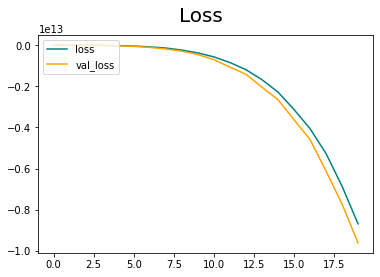

In [29]:

 fig = plt.figure()
 plt.plot(hist.history['loss'], color='teal', label='loss')
 plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
 fig.suptitle('Loss', fontsize=20)
 plt.legend(loc="upper left")
 plt.show()

1/1 [==============================] - 1s 504ms/step
tf.Tensor(0.99553573, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.02232143, shape=(), dtype=float32)


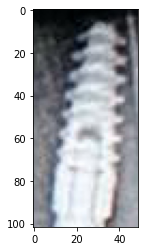

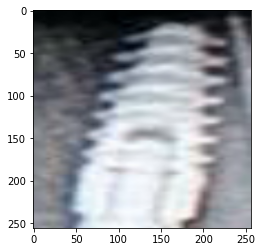

1/1 [==============================] - 0s 94ms/step
[[1.]]


In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())
img = cv2.imread('/74449841_117660606327521_3872981360394108928_n_17.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)